In [15]:
# UCS654 : Predictive Analysis Using Statistics
# Name : Vaibhav Srivastva
# Roll No. : 102316037
# Sub-Group : 3P12
# Lecture Group : L2
# Date : 31 Jan 2026

In [16]:
import numpy as np
import pandas as pd

In [17]:
# source : https://forms.gle/jYF3MDKozRnSCHvR8
data = pd.read_csv("data.csv", encoding = "latin1", low_memory = False)
roll_num = 102316037
# print(data.head)
# size : 435742 x 13

In [18]:
# Step 1 : transform x values to z values
x = data["no2"].dropna().values
a_r = 0.05 * (roll_num % 7)
b_r = 0.30 * ((roll_num % 5) + 1)
z = x + a_r * np.sin(b_r * x)   # an array; T_r(x) := x
print(z)

[17.41198622  7.00420348 28.62362485 ... 45.08353779 50.21272588
 45.86735271]


In [19]:
# Step 2 : learn parameters of the p.d.f. where p_cap(z) = c * exp(-lambda * (z - mu)^2)
mu = np.mean(z)     # mean of values
sigma = np.std(z)  # standard deviation of values
lmb = np.pow(2 * np.pow(sigma, 2), -1)  # "lambda" is a reserved keyword
c = np.sqrt(lmb / np.pi)

In [20]:
# Step 3 : final values of parameters

print(mu, lmb, c)

# submission link : https://forms.gle/jYF3MDKozRnSCHvR8

25.802708360471062 0.00145909052901164 0.02155093826777716


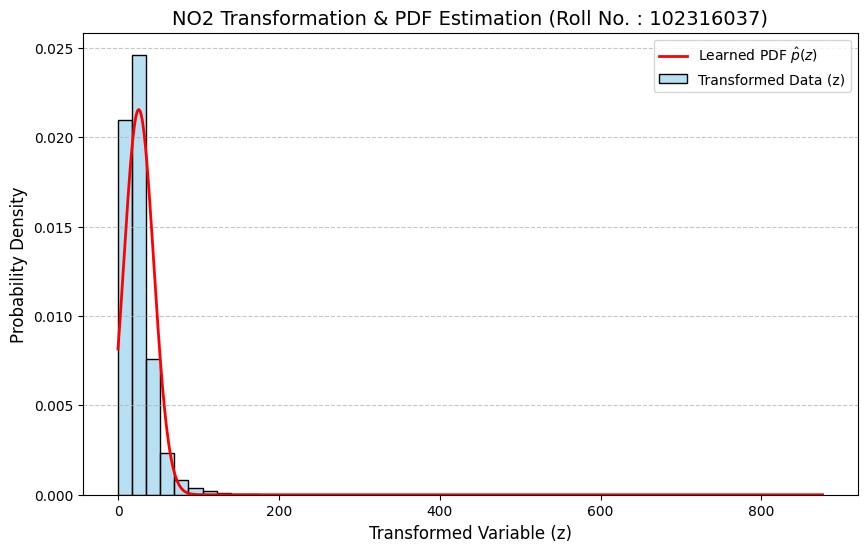

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def predicted_pdf(z_val, mu_val, lmb_val, c_val):
    return c_val * np.exp(-lmb_val * (z_val - mu_val)**2)

# generate range of z values
z_range = np.linspace(z.min(), z.max(), 1000)
p_z = predicted_pdf(z_range, mu, lmb, c)


plt.figure(figsize=(10, 6))

# Histogram of transformed data (z)
sns.histplot(z, bins=50, stat="density", color="skyblue", label="Transformed Data (z)", alpha=0.6)

# learned p.d.f. Curve
plt.plot(z_range, p_z, color="red", lw=2, label=f"Learned PDF $\hat{{p}}(z)$")

plt.title(f"NO2 Transformation & PDF Estimation (Roll No. : {roll_num})", fontsize=14)
plt.xlabel("Transformed Variable (z)", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()